In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import plotly.express as px
!pip install pyxlsb
from pyxlsb import open_workbook as open_xlsb



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas-profiling --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f8780a9190ed0ab3bf737b240628a71df941953ec2dbf7c0fae9bf8c209ed1ef
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/Data.csv',encoding='latin1')

#**Understanding the Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  object
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_desc      1034537 non-null  object
 9   program_genre     1048575 non-null  object
 10  series_title      1048575 non-null  int64 
 11  hd                1048575 non-null  int64 
 12  original_name     1048575 non-null  object
dtypes: int64(7), object(6)
memory usage: 104.0+ MB


In [6]:
from pandas_profiling import ProfileReport

<ipython-input-6-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [8]:
df.describe()

,Column1,user_id_maped,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.281730e+05,1.709266e+04,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,3.597041e+05,1.003513e+04,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.180660e+05,8.253000e+03,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.303550e+05,1.714900e+04,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,9.398225e+05,2.566500e+04,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.247852e+06,3.428000e+04,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [20]:
len(df.columns)

11

In [10]:
df.columns

Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

# **Data Exploratory**
In this part we explore our data using questions and plots to understand the data further more

In [40]:
# Pandas profiling before data preprocessing
profile = ProfileReport(df, title='Pandas profiling before data preprcessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [12]:
# Print unique values
df.nunique()

Column1             1048575
date_                   411
user_id_maped         11578
program_name           8270
duration_seconds      18958
program_class             2
season                   22
episode                 281
program_desc          11176
program_genre            16
series_title              2
hd                        2
original_name          1795
dtype: int64

#**Data Cleaning**

In [13]:
df.isnull().sum()

Column1                 0
date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        14038
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64

In [14]:
df = df.drop('program_desc', axis=1)

In [15]:
df.isnull().sum()

Column1             0
date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_genre       0
series_title        0
hd                  0
original_name       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  object
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_genre     1048575 non-null  object
 9   series_title      1048575 non-null  int64 
 10  hd                1048575 non-null  int64 
 11  original_name     1048575 non-null  object
dtypes: int64(7), object(5)
memory usage: 96.0+ MB


In [17]:
df = df.drop('Column1',axis=1)

In [18]:
df.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_genre', 'series_title',
       'hd', 'original_name'],
      dtype='object')

In [19]:
df[df['program_class']=='SERIES/EPISODES']

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,series_title,hd,original_name
22,12/3/2017,19694,Hell On Wheels The White pirit,2650,SERIES/EPISODES,2,7,Drama,0,0,Hell On Wheels
52,12/17/2017,730,PAW Patrol Pups And The Ghost Pirate,1388,SERIES/EPISODES,1,10,Animation,0,0,PAW Patrol
68,10/31/2017,5094,Zoo Ten Years Gone,2403,SERIES/EPISODES,3,3,Action,0,0,Zoo
71,3/14/2017,5542,Littlest Pet hop (T) Lotsa Luck,688,SERIES/EPISODES,1,22,Animation,0,1,Littlest Pet hop (T)
72,12/4/2017,18960,Dora the Explorer Dora's Fantastic Gymnastics...,1379,SERIES/EPISODES,7,5,Animation,0,0,Dora the Explorer
...,...,...,...,...,...,...,...,...,...,...,...
1048566,11/24/2017,32530,Blaze And The Monster Machines Zeg And The Egg,1320,SERIES/EPISODES,1,13,Animation,0,0,Blaze And The Monster Machines
1048568,2/19/2018,1461,Teen Wolf The Fox And The Wolf,1513,SERIES/EPISODES,3,21,Action,0,0,Teen Wolf
1048569,11/23/2017,2531,Blaze And The Monster Machines The Mystery Ba...,1321,SERIES/EPISODES,1,12,Animation,0,0,Blaze And The Monster Machines
1048571,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy,0,0,Friends


#**Feature Enginering**


In [21]:
# Calculate the total duration of programs watched by each user
duration_totals = df.groupby('user_id_maped')['duration_seconds'].sum()

df['user_total_duration'] = df['user_id_maped'].map(duration_totals)

In [22]:
# Calculate the total duration of programs watched by each user
duration_totals = df.groupby('program_name')['duration_seconds'].sum()

df['program_total_duration'] = df['program_name'].map(duration_totals)

In [23]:
# Count the number of unique users who watched each program
program_users = df.groupby('program_name')['user_id_maped'].nunique()

# Add a new column to the dataframe containing the number of users who watched each program
df['program_users'] = df['program_name'].map(program_users)


In [24]:
df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,series_title,hd,original_name,user_total_duration,program_total_duration,program_users
0,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama,0,0,100 treets,20640,7732,37
1,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation,0,1,Moana,55,5545960,2112
2,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,0,1,The Mermaid Princess,2621,1665429,2065
3,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,0,1,The Mermaid Princess,575,1665429,2065
4,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography,0,1,Churchill,315,305945,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4/22/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror,0,0,Extraterrestrial,480371,342528,367
1048571,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy,0,0,Friends,396263,367103,58
1048572,6/15/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror,0,0,Masters of Horror,555115,241250,67
1048573,9/11/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama,0,1,Two Lovers and a Bear,3737,24893,117


In [25]:
# Group the data by 'program_class' column
grouped = df.groupby('program_class').agg(
    Total_watch_time_in_seconds=('duration_seconds', 'sum')
)

# Calculate the total watch time in hours and rename the columns
grouped = grouped.assign(
    Total_watch_time_in_hours=grouped['Total_watch_time_in_seconds'] / 3600
).reset_index()

# Create a pie chart of the total duration spent by program class
fig = px.pie(grouped, values='Total_watch_time_in_hours', names='program_class',
             title='Total Duration Spent by Program Class')
fig.show()

In [26]:
# Group the data by 'program_class' column
grouped = df.groupby('program_class').agg(
    No_of_Users_who_Watched=('user_id_maped', 'nunique')
).reset_index()

# Create a pie chart of the total number of users watching by program class
fig = px.pie(grouped, values='No_of_Users_who_Watched', names='program_class',
             title='Total Users Watching by Program Class')
fig.show()

In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [28]:
# Group the data by 'program_class' and 'hd' columns
grouped = df.groupby(['program_class', 'hd']).agg(
    No_of_Users_who_Watched=('user_id_maped', 'nunique')
).reset_index()

# Create a pie chart of the number of users who watched for SERIES/EPISODES
fig = px.pie(grouped[grouped['program_class'] == 'SERIES/EPISODES'], values='No_of_Users_who_Watched',
             names='hd', title='No of Users who Watched - SERIES/EPISODES')
fig.update_traces(direction='clockwise', sort=True)
fig.show()

In [29]:
# Group the data by 'program_class' and 'hd' columns
grouped = df.groupby(['program_class', 'hd']).agg(
    No_of_Users_who_Watched=('user_id_maped', 'nunique')
).reset_index()

# Create a pie chart of the number of users who watched for MOVIE
fig = px.pie(grouped[grouped['program_class'] == 'MOVIE'], values='No_of_Users_who_Watched',
              names='hd', title='No of Users who Watched - MOVIE')
fig.update_traces(direction='clockwise', sort=True)
fig.show()

In [30]:
df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,series_title,hd,original_name,user_total_duration,program_total_duration,program_users
0,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama,0,0,100 treets,20640,7732,37
1,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation,0,1,Moana,55,5545960,2112
2,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,0,1,The Mermaid Princess,2621,1665429,2065
3,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,0,1,The Mermaid Princess,575,1665429,2065
4,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography,0,1,Churchill,315,305945,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4/22/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror,0,0,Extraterrestrial,480371,342528,367
1048571,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy,0,0,Friends,396263,367103,58
1048572,6/15/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror,0,0,Masters of Horror,555115,241250,67
1048573,9/11/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama,0,1,Two Lovers and a Bear,3737,24893,117


<ipython-input-31-fe5a6bdfcd8f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



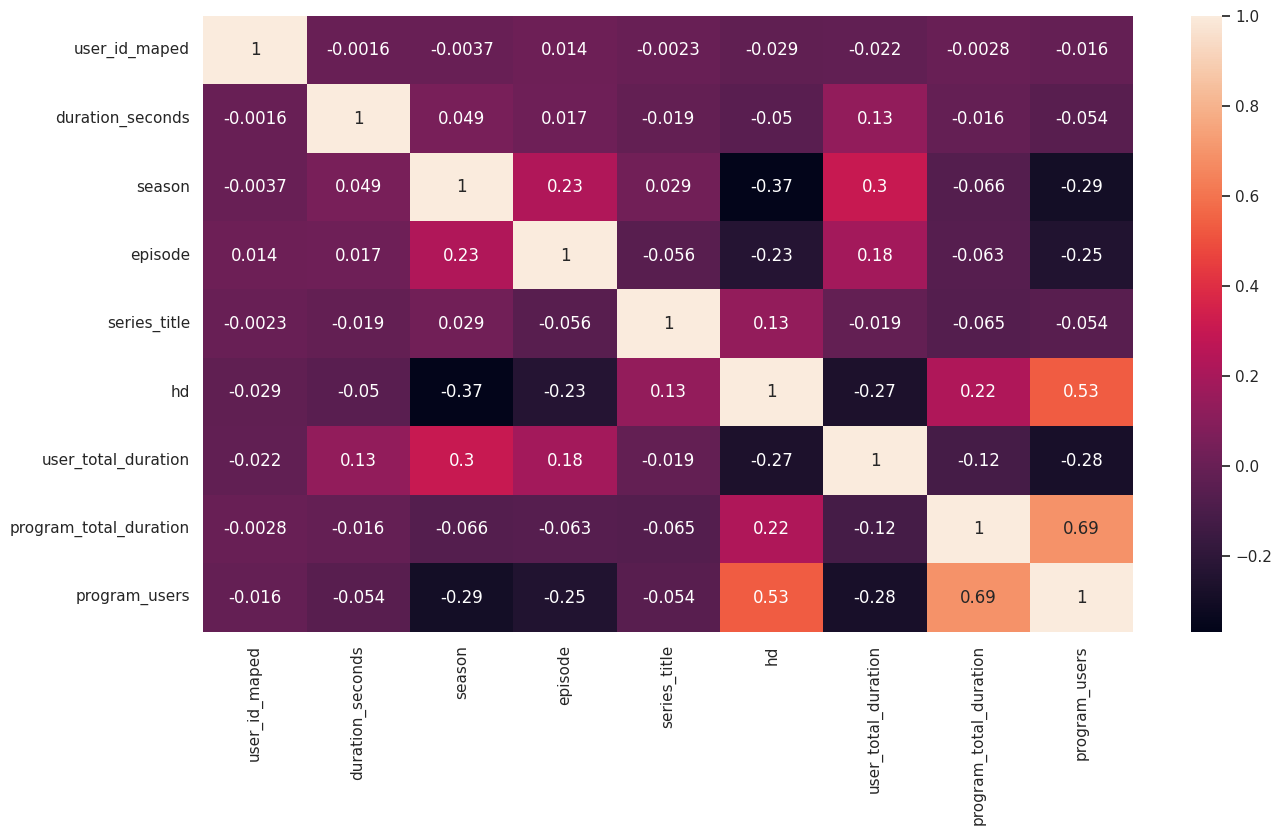

In [31]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df.corr(), annot = True,color="#FF5969")

In [32]:
df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,series_title,hd,original_name,user_total_duration,program_total_duration,program_users
0,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama,0,0,100 treets,20640,7732,37
1,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation,0,1,Moana,55,5545960,2112
2,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,0,1,The Mermaid Princess,2621,1665429,2065
3,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,0,1,The Mermaid Princess,575,1665429,2065
4,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography,0,1,Churchill,315,305945,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4/22/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror,0,0,Extraterrestrial,480371,342528,367
1048571,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy,0,0,Friends,396263,367103,58
1048572,6/15/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror,0,0,Masters of Horror,555115,241250,67
1048573,9/11/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama,0,1,Two Lovers and a Bear,3737,24893,117


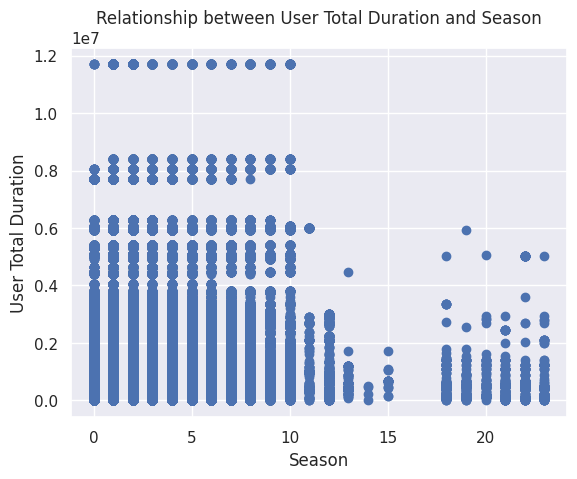

In [37]:
# Create a scatter plot with season on the x-axis and user_total_duration on the y-axis
plt.scatter(df['season'], df['user_total_duration'])

# Set the axis labels and title
plt.xlabel('Season')
plt.ylabel('User Total Duration')
plt.title('Relationship between User Total Duration and Season')

# Show the plot
plt.show()

In [39]:
import plotly.express as px

# Get the counts of program genres
genre_counts = df['program_genre'].value_counts()

# Create a pie chart of program genres
fig = px.pie(values=genre_counts.values, names=genre_counts.index, title='Percentage of Programs by Genre')
fig.show()

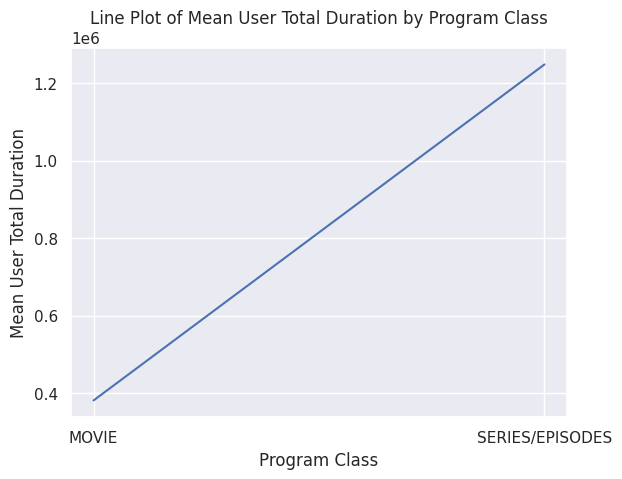

In [44]:
# Compute the mean user_total_duration for each program_class
mean_duration = df.groupby('program_class')['user_total_duration'].mean()

# Create a line plot with program_class on the x-axis and mean user_total_duration on the y-axis
plt.plot(mean_duration.index, mean_duration)

# Set the axis labels and title
plt.xlabel('Program Class')
plt.ylabel('Mean User Total Duration')
plt.title('Line Plot of Mean User Total Duration by Program Class')


# Save the plot to a file
plt.show()